In [ ]:
!pip install wooldridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as wd

import statsmodels.api as sm

## Manipulación de información

In [90]:
df = wd.data('wage1')

In [91]:
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [93]:
df = df[['wage','educ','exper','expersq','female','married']]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     526 non-null    float64
 1   educ     526 non-null    int64  
 2   exper    526 non-null    int64  
 3   expersq  526 non-null    int64  
 4   female   526 non-null    int64  
 5   married  526 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 24.8 KB


In [95]:
df.head()

,wage,educ,exper,expersq,female,married
0,3.10,11,2,4,1,0
1,3.24,12,22,484,1,1
2,3.00,11,2,4,0,0
3,6.00,8,44,1936,0,1
4,5.30,12,7,49,0,1


In [ ]:
.df.tail()

,wage,educ,exper,expersq,female,married
521,15.00,16,14,196,1,1
522,2.27,10,2,4,1,0
523,4.67,15,13,169,0,1
524,11.56,16,5,25,0,1
525,3.50,14,5,25,1,0


In [ ]:
df.shape

(526, 6)

### Acceder a la información

In [97]:
#acceder a columnas
df['wage']

0       3.10
1       3.24
2       3.00
3       6.00
4       5.30
       ...  
521    15.00
522     2.27
523     4.67
524    11.56
525     3.50
Name: wage, Length: 526, dtype: float64

In [98]:
df.loc[:, 'wage']

0       3.10
1       3.24
2       3.00
3       6.00
4       5.30
       ...  
521    15.00
522     2.27
523     4.67
524    11.56
525     3.50
Name: wage, Length: 526, dtype: float64

In [99]:
df.iloc[:, 0]

0       3.10
1       3.24
2       3.00
3       6.00
4       5.30
       ...  
521    15.00
522     2.27
523     4.67
524    11.56
525     3.50
Name: wage, Length: 526, dtype: float64

In [100]:
df.loc[:, ['wage','educ']]

,wage,educ
0,3.10,11
1,3.24,12
2,3.00,11
3,6.00,8
4,5.30,12
...,...,...
521,15.00,16
522,2.27,10
523,4.67,15
524,11.56,16


In [101]:
df.iloc[:, [0,2]]

,wage,exper
0,3.10,2
1,3.24,22
2,3.00,2
3,6.00,44
4,5.30,7
...,...,...
521,15.00,14
522,2.27,2
523,4.67,13
524,11.56,5


### Crear y eliminar columnas

In [102]:
df['ncol1'] = 5
df['ncol2'] = df['wage'] + df['educ']
df['ncol3'] = [i**2 for i in df['exper']]
df = df.assign(ncol4=df['wage'] / 2)
df

,wage,educ,exper,expersq,female,married,ncol1,ncol2,ncol3,ncol4
0,3.10,11,2,4,1,0,5,14.10,4,1.550
1,3.24,12,22,484,1,1,5,15.24,484,1.620
2,3.00,11,2,4,0,0,5,14.00,4,1.500
3,6.00,8,44,1936,0,1,5,14.00,1936,3.000
4,5.30,12,7,49,0,1,5,17.30,49,2.650
...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,196,1,1,5,31.00,196,7.500
522,2.27,10,2,4,1,0,5,12.27,4,1.135
523,4.67,15,13,169,0,1,5,19.67,169,2.335
524,11.56,16,5,25,0,1,5,27.56,25,5.780


In [105]:
df.pop('ncol1')

0      5
1      5
2      5
3      5
4      5
      ..
521    5
522    5
523    5
524    5
525    5
Name: ncol1, Length: 526, dtype: int64

In [106]:
df

,wage,educ,exper,expersq,female,married,ncol2,ncol3,ncol4
0,3.10,11,2,4,1,0,14.10,4,1.550
1,3.24,12,22,484,1,1,15.24,484,1.620
2,3.00,11,2,4,0,0,14.00,4,1.500
3,6.00,8,44,1936,0,1,14.00,1936,3.000
4,5.30,12,7,49,0,1,17.30,49,2.650
...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,196,1,1,31.00,196,7.500
522,2.27,10,2,4,1,0,12.27,4,1.135
523,4.67,15,13,169,0,1,19.67,169,2.335
524,11.56,16,5,25,0,1,27.56,25,5.780


In [107]:
del df['ncol2']
df

,wage,educ,exper,expersq,female,married,ncol3,ncol4
0,3.10,11,2,4,1,0,4,1.550
1,3.24,12,22,484,1,1,484,1.620
2,3.00,11,2,4,0,0,4,1.500
3,6.00,8,44,1936,0,1,1936,3.000
4,5.30,12,7,49,0,1,49,2.650
...,...,...,...,...,...,...,...,...
521,15.00,16,14,196,1,1,196,7.500
522,2.27,10,2,4,1,0,4,1.135
523,4.67,15,13,169,0,1,169,2.335
524,11.56,16,5,25,0,1,25,5.780


In [108]:
df.drop(columns=['ncol3','ncol4'])

,wage,educ,exper,expersq,female,married
0,3.10,11,2,4,1,0
1,3.24,12,22,484,1,1
2,3.00,11,2,4,0,0
3,6.00,8,44,1936,0,1
4,5.30,12,7,49,0,1
...,...,...,...,...,...,...
521,15.00,16,14,196,1,1
522,2.27,10,2,4,1,0
523,4.67,15,13,169,0,1
524,11.56,16,5,25,0,1


In [109]:
df.drop(columns=['ncol3','ncol4'], inplace=True)

### Filtrar información

In [110]:
df[df['female'] == 0]

,wage,educ,exper,expersq,female,married
2,3.00,11,2,4,0,0
3,6.00,8,44,1936,0,1
4,5.30,12,7,49,0,1
5,8.75,16,9,81,0,1
6,11.25,18,15,225,0,0
...,...,...,...,...,...,...
518,7.50,12,18,324,0,1
519,4.75,13,47,2209,0,1
520,5.65,12,2,4,0,0
523,4.67,15,13,169,0,1


In [114]:
filtro = df[(df['female'] == 1) & (df['married'] == 1) & (df['wage'] > 8)]
filtro #&, | 

,wage,educ,exper,expersq,female,married
41,10.00,12,20,400,1,1
139,10.00,14,28,784,1,1
148,11.55,16,20,400,1,1
176,9.00,12,11,121,1,1
216,8.10,12,38,1444,1,1
310,8.02,18,23,529,1,1
435,9.42,14,23,529,1,1
514,9.00,17,7,49,1,1
521,15.00,16,14,196,1,1


### Cambiar nombres de columnas

In [115]:
df.rename(columns={'wage':'salario','educ':'educacion'})

,salario,educacion,exper,expersq,female,married
0,3.10,11,2,4,1,0
1,3.24,12,22,484,1,1
2,3.00,11,2,4,0,0
3,6.00,8,44,1936,0,1
4,5.30,12,7,49,0,1
...,...,...,...,...,...,...
521,15.00,16,14,196,1,1
522,2.27,10,2,4,1,0
523,4.67,15,13,169,0,1
524,11.56,16,5,25,0,1


### Cambiar valores

In [116]:
df.replace({'female':{1:'F',0:'M'}, 'married':{1:'si',0:'no'}})

,wage,educ,exper,expersq,female,married
0,3.10,11,2,4,F,no
1,3.24,12,22,484,F,si
2,3.00,11,2,4,M,no
3,6.00,8,44,1936,M,si
4,5.30,12,7,49,M,si
...,...,...,...,...,...,...
521,15.00,16,14,196,F,si
522,2.27,10,2,4,F,no
523,4.67,15,13,169,M,si
524,11.56,16,5,25,M,si


In [117]:
df = df.replace({'female':{1:'F',0:'M'}, 'married':{1:'si',0:'no'}})

In [118]:
df

,wage,educ,exper,expersq,female,married
0,3.10,11,2,4,F,no
1,3.24,12,22,484,F,si
2,3.00,11,2,4,M,no
3,6.00,8,44,1936,M,si
4,5.30,12,7,49,M,si
...,...,...,...,...,...,...
521,15.00,16,14,196,F,si
522,2.27,10,2,4,F,no
523,4.67,15,13,169,M,si
524,11.56,16,5,25,M,si


### Organizar información

In [ ]:
df.sort_values(by='wage')

,wage,educ,exper,expersq,female,married
23,0.530000,12,3,9,F,no
515,1.430000,12,17,289,F,si
127,1.500000,8,31,961,M,no
452,1.500000,12,11,121,F,si
50,1.630000,12,18,324,F,no
...,...,...,...,...,...,...
58,21.629999,18,8,64,F,no
185,21.860001,12,24,576,M,si
14,22.200001,12,31,961,M,si
228,22.860001,16,16,256,M,si


In [ ]:
df.sort_values(by='wage', ascending=False)

,wage,educ,exper,expersq,female,married
111,24.980000,18,29,841,M,si
228,22.860001,16,16,256,M,si
14,22.200001,12,31,961,M,si
185,21.860001,12,24,576,M,si
58,21.629999,18,8,64,F,no
...,...,...,...,...,...,...
50,1.630000,12,18,324,F,no
127,1.500000,8,31,961,M,no
452,1.500000,12,11,121,F,si
515,1.430000,12,17,289,F,si


In [120]:
df.sort_values(by=['educ','exper']).head(30)

,wage,educ,exper,expersq,female,married
378,4.17,0,22,484,F,no
502,2.89,0,42,1764,F,si
138,3.75,2,39,1521,M,si
464,2.92,3,51,2601,M,no
469,3.00,4,36,1296,M,si
37,3.51,4,39,1521,M,si
305,3.00,4,48,2304,M,si
503,2.90,5,34,1156,F,si
395,3.76,6,6,36,M,no
396,3.10,6,14,196,F,no


## Descripción de la información

In [ ]:
df.describe()

,wage,educ,exper,expersq
count,526.000000,526.000000,526.00000,526.000000
mean,5.896103,12.562738,17.01711,473.435361
std,3.693086,2.769022,13.57216,616.044772
min,0.530000,0.000000,1.00000,1.000000
25%,3.330000,12.000000,5.00000,25.000000
50%,4.650000,12.000000,13.50000,182.500000
75%,6.880000,14.000000,26.00000,676.000000
max,24.980000,18.000000,51.00000,2601.000000


In [122]:
desc = df.describe().T
desc['coef_var'] = desc['std'] / desc['mean'].abs()
desc = desc.T

In [123]:
desc

,wage,educ,exper,expersq
count,526.000000,526.000000,526.00000,526.000000
mean,5.896103,12.562738,17.01711,473.435361
std,3.693086,2.769022,13.57216,616.044772
min,0.530000,0.000000,1.00000,1.000000
25%,3.330000,12.000000,5.00000,25.000000
50%,4.650000,12.000000,13.50000,182.500000
75%,6.880000,14.000000,26.00000,676.000000
max,24.980000,18.000000,51.00000,2601.000000
coef_var,0.626361,0.220416,0.79756,1.301223


In [ ]:
df[['female','married']].describe()

,female,married
count,526,526
unique,2,2
top,M,si
freq,274,320


In [ ]:
df['wage'].mean()

5.896102674787035

In [ ]:
df['wage'].median()

4.650000095367432

In [ ]:
df['wage'].var()

13.638884363775011

In [ ]:
df['wage'].quantile(.25)

3.3299999237060547

In [ ]:
df['wage'].quantile(.75)

6.880000114440918

In [ ]:
df['wage'].max()

24.979999542236328

In [ ]:
df['wage'].min()

0.5299999713897705

In [125]:
df['educ'].value_counts(normalize=True)

12    0.376426
16    0.129278
14    0.100760
13    0.074144
10    0.057034
11    0.055133
8     0.041825
15    0.039924
18    0.036122
9     0.032319
17    0.022814
6     0.011407
7     0.007605
4     0.005703
0     0.003802
2     0.001901
3     0.001901
5     0.001901
Name: educ, dtype: float64

In [ ]:
df['female'].value_counts()

M    274
F    252
Name: female, dtype: int64

In [ ]:
df['female'].value_counts(normalize=True)

M    0.520913
F    0.479087
Name: female, dtype: float64

In [126]:
df.pivot_table(index='female',columns='married', values='wage',aggfunc='median')

married,no,si
female,,
F,3.50,4.0
M,4.41,6.5


## Visualización de la información

### Cantidades

In [ ]:
fem = df['female'].value_counts()
fem

M    274
F    252
Name: female, dtype: int64

In [ ]:
fem.index

Index(['M', 'F'], dtype='object')

In [ ]:
fem.values

array([274, 252])

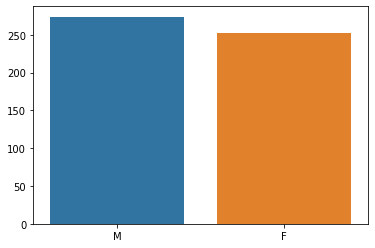

In [ ]:
sns.barplot(x=fem.index, y=fem.values)

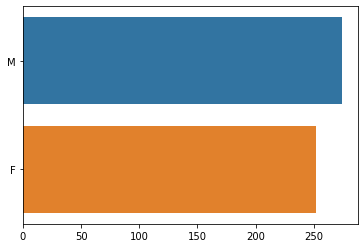

In [ ]:
sns.barplot(y=fem.index, x=fem.values, orient='h')

In [134]:
df['educ_inter'] = pd.cut(df['educ'], 5)
df

,wage,educ,exper,expersq,female,married,educ_inter
0,3.10,11,2,4,F,no,"(10.8, 14.4]"
1,3.24,12,22,484,F,si,"(10.8, 14.4]"
2,3.00,11,2,4,M,no,"(10.8, 14.4]"
3,6.00,8,44,1936,M,si,"(7.2, 10.8]"
4,5.30,12,7,49,M,si,"(10.8, 14.4]"
...,...,...,...,...,...,...,...
521,15.00,16,14,196,F,si,"(14.4, 18.0]"
522,2.27,10,2,4,F,no,"(7.2, 10.8]"
523,4.67,15,13,169,M,si,"(14.4, 18.0]"
524,11.56,16,5,25,M,si,"(14.4, 18.0]"


In [135]:
pivot = df.pivot_table(index=['educ_inter','female'],values='wage',aggfunc='mean' ).reset_index()
pivot

,educ_inter,female,wage
0,"(-0.018, 3.6]",F,3.530000
1,"(-0.018, 3.6]",M,3.335000
2,"(3.6, 7.2]",F,3.470000
3,"(3.6, 7.2]",M,4.057778
4,"(7.2, 10.8]",F,3.263333
5,"(7.2, 10.8]",M,4.830833
6,"(10.8, 14.4]",F,4.297674
7,"(10.8, 14.4]",M,6.764286
8,"(14.4, 18.0]",F,7.119750
9,"(14.4, 18.0]",M,9.172625


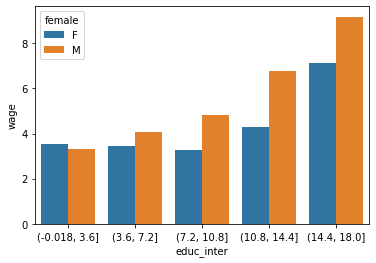

In [ ]:
sns.barplot(data=pivot, x='educ_inter', y='wage',hue='female')

###Heatmaps

In [136]:
df[['wage','educ','exper']].corr()

,wage,educ,exper
wage,1.000000,0.405903,0.112903
educ,0.405903,1.000000,-0.299542
exper,0.112903,-0.299542,1.000000


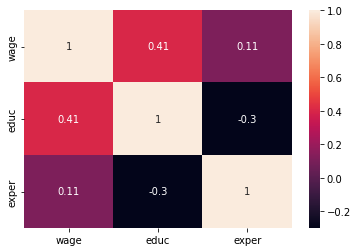

In [137]:
sns.heatmap(df[['wage','educ','exper']].corr(),annot=True)

### Distribuciones

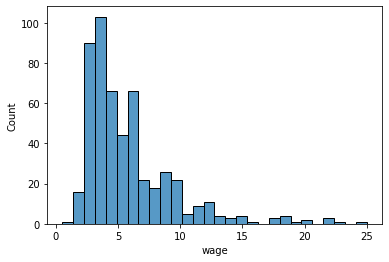

In [ ]:
sns.histplot(x=df['wage'])

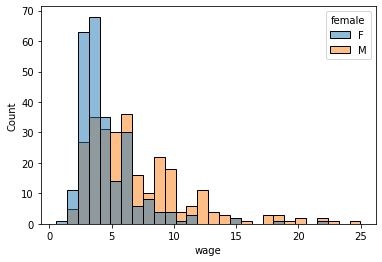

In [ ]:
sns.histplot(data=df, x='wage', hue='female')

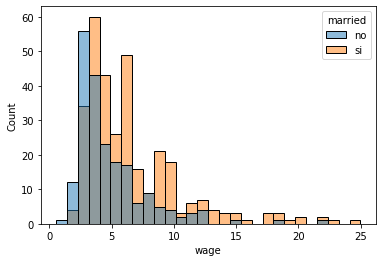

In [ ]:
sns.histplot(data=df, x='wage', hue='married')

### Dispersión

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


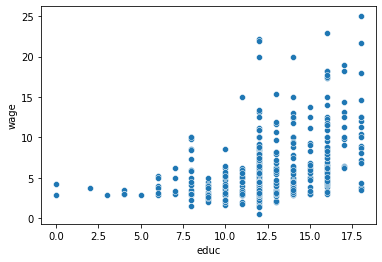

In [ ]:
sns.scatterplot(df['educ'],df['wage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


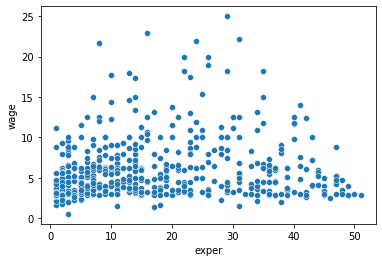

In [ ]:
sns.scatterplot(df['exper'],df['wage'])

### Múltiples distribuciones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


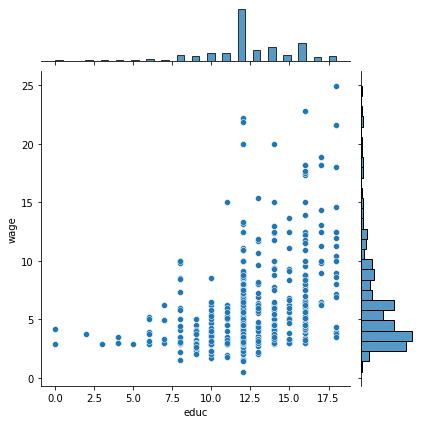

In [ ]:
sns.jointplot(df['educ'],df['wage'])

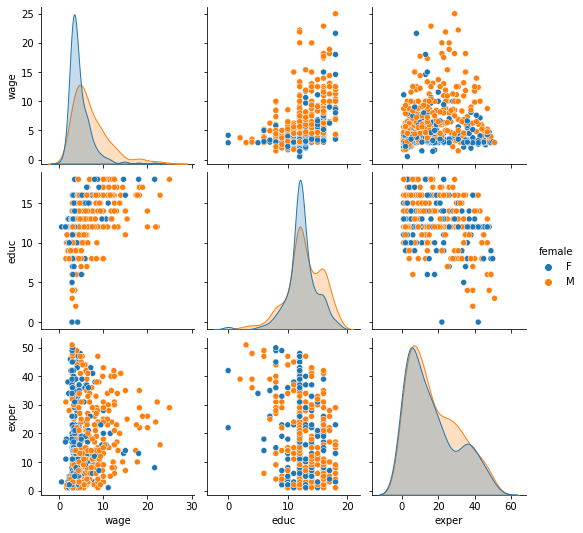

In [ ]:
sns.pairplot(df[['wage','educ','exper','female']], hue='female')

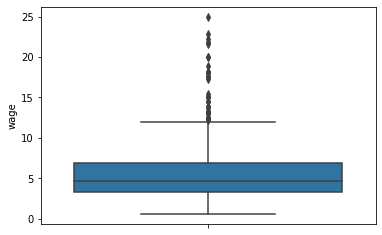

In [ ]:
sns.boxplot(data=df, y='wage')

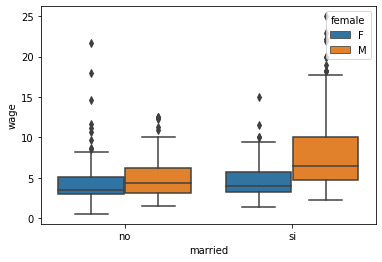

In [ ]:
sns.boxplot(data=df, x='married', y='wage', hue='female')

## Modelamiento

In [139]:
df = df.replace({'female':{'F':1,'M':0}})

In [140]:
y = df['wage']
X = df[['educ','exper','expersq','female']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     70.17
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.62e-47
Time:                        22:44:18   Log-Likelihood:                -1319.7
No. Observations:                 526   AIC:                             2649.
Df Residuals:                     521   BIC:                             2671.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3192      0.739     -3.139      0.002      -3.771      -0.868
educ           0.5563      0.050     11.062      0.000       0.457       0.655
exper          0.2551      0.035      7.317      0.000       0.187       0.324
expersq       -0.0044      0.001     -5.720      0.000      -0.006      -0.003
female        -2.1140      0.263     -8.052      0.000      -2.630      -1.598
==============================================================================
Omnibus:                      187.485   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.021
Skew:                           1.612   Prob(JB):                    6.62e-155
Kurtosis:                       7.691   Cond. No.                     4.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""